In [14]:
import pandas as pd
import pprint
import warnings
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
product = pd.read_csv('Datos\Datos looks\product.csv')
brand = pd.read_csv('Datos\Datos looks//brand.csv')
color = pd.read_csv('Datos\Datos looks\color.csv')
feature_value_family = pd.read_csv('Datos\Datos looks//feature_value_family.csv')
feature_value= pd.read_csv('Datos\Datos looks//feature_value.csv')
feature= pd.read_csv('Datos\Datos looks//feature.csv')
product_feature_value_qualifier = pd.read_csv('Datos\Datos looks\product_feature_value_qualifier.csv')
product_feature_value = pd.read_csv('Datos\Datos looks\product_feature_value.csv')
product_variant = pd.read_csv('Datos\Datos looks\product_variant.csv')
season= pd.read_csv('Datos\Datos looks//season.csv')
size = pd.read_csv('Datos\Datos looks//size.csv')

In [16]:
product.shape

(2932, 7)

In [17]:
tabla1 = pd.merge(product, brand, how='left', left_on='brand_id', right_on='id', suffixes=['','y'])
tabla1 = tabla1.drop(columns=['idy'])
tabla1.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0
1,6e6b4255-006a-4d13-b312-3b1426290d8e,ce8d442c-e662-44f8-a130-2e436f119ede,6598b655-3e19-448c-8b4f-ff6a29447b34,P1393,9727,Poly Pant deeluxe,"[""LOOKIERO""]",BRAND117,NO_MAINSTREAM,0
2,6549c1b1-989e-432a-bdc9-b603c438b310,cfca4b92-12a6-411c-a62a-a874d00aa735,1b93b30c-833f-45a8-ba69-c21d2e7f4824,J1738,16138,Onleden Sweater knt,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0
3,dace6963-7e84-4cef-a153-3c6fb29cc7c3,1600fb81-6f8b-4fa2-9ae2-a33420125939,c6b81db8-29ed-43d6-b14d-0fd913d7ce36,K892,11621,Cerise Jacket print,"[""LOOKIERO""]",BRAND15,WHOLE_SALE,0
4,d6679919-7a49-4edd-bd04-982289d0e8ac,09358432-a44c-4cb4-b8e6-bf51b403bf39,c59807ac-0362-4078-94b0-37ea3df6cdd0,S2517,14076,Auttum Shirt hippie,"[""LOOKIERO""]",BRAND4,WHOLE_SALE,0


In [18]:
tabla1.shape

(2932, 10)

In [19]:
tabla2 = pd.merge(tabla1, product_variant, how='left', right_on='product_id', left_on='id', suffixes=['', '_variant'])
tabla2 = tabla2.drop(columns=['product_id'])
tabla2.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,id_variant,barcode,color_id,legacy_id_variant,season,size_id,stock,publishable
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,740661,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,1920105d-0671-412b-b09f-ef1c983f2be5,740647,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,77df887d-f7da-42bd-9ebf-a5a2ca57974f,0,t
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,a3a0144e-7aa5-4572-b513-285059a14735,740630,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,c85666c0-a8ba-42f4-a30f-17687ad51ff5,740708,a4902902-49e1-4132-af75-982ab7afec9d,\N,8,cbbdcb38-00c1-4ec2-a76b-cdf948cc81ce,0,t
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,93db9797-3a66-4889-be9c-5d3522da96a1,740739,f570d998-7aa4-442d-8a2f-7885bd499729,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t


In [20]:
tabla3 = pd.merge(tabla2, color, how='left', right_on='id', left_on='color_id', suffixes=['', '_color'])
tabla3 = tabla3.drop(columns=['id_color'])
tabla3.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,color_id,legacy_id_variant,season,size_id,stock,publishable,code,hexadecimal,name_color,parent
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,a1b735a2-d6e2-4bc8-8502-ccab18802622,0,t,C2,000000,black,\N
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,77df887d-f7da-42bd-9ebf-a5a2ca57974f,0,t,C2,000000,black,\N
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,6183657f-3a82-449d-aa6a-a14e96b0e9dd,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t,C2,000000,black,\N
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,a4902902-49e1-4132-af75-982ab7afec9d,\N,8,cbbdcb38-00c1-4ec2-a76b-cdf948cc81ce,0,t,C15,DFC8B2,beige,\N
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,f570d998-7aa4-442d-8a2f-7885bd499729,\N,8,0190622f-f028-42a8-b50e-ce310e8a9700,0,t,C27,B94600,rust,e9f37c85-a5bd-4f52-a891-b575ab2f787f


In [21]:
tabla4= pd.merge(tabla3, size, how='left', right_on='id', left_on='size_id', suffixes=['', '_drop'])
tabla4 = tabla4.drop(columns=['id_drop'])
tabla4.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,publishable,code,hexadecimal,name_color,parent,europe,lookiero,uk,"""order""",visual_order
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""38"", ""format"": ""38""}","{""size"": ""M"", ""format"": ""M""}","{""size"": ""10"", ""format"": ""10""}",38,16
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C2,000000,black,\N,"{""size"": ""36"", ""format"": ""36""}","{""size"": ""S"", ""format"": ""S""}","{""size"": ""8"", ""format"": ""8""}",24,11
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C15,DFC8B2,beige,\N,"{""size"": ""40"", ""format"": ""40""}","{""size"": ""L"", ""format"": ""L""}","{""size"": ""12"", ""format"": ""12""}",51,21
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,t,C27,B94600,rust,e9f37c85-a5bd-4f52-a891-b575ab2f787f,"{""size"": ""36"", ""format"": ""36""}","{""size"": ""S"", ""format"": ""S""}","{""size"": ""8"", ""format"": ""8""}",24,11


In [22]:
tabla5= pd.merge(tabla4, product_feature_value, how='left', right_on='product_id', left_on='id', suffixes=['', '_feature'])
tabla5 = tabla5.drop(columns=['product_id'])
tabla5.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,hexadecimal,name_color,parent,europe,lookiero,uk,"""order""",visual_order,id_feature,feature_value_id
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,000000,black,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058


In [23]:
tabla6= pd.merge(tabla5, feature_value, how='left', right_on='id', left_on='feature_value_id', suffixes=['', '_drop'])
tabla6 = tabla6.drop(columns=['id_drop'])
tabla6.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,parent,europe,lookiero,uk,"""order""",visual_order,id_feature,feature_value_id,value,feature_id
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806,ribbed,10e14a5d-39b6-4045-93cc-1574f68606ec
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541,two,604b76cd-27a8-45ef-8734-618639ff331a
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629,without_closing,2e2a28f9-566d-419f-9081-cc9061324110
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,\N,"{""size"": ""42"", ""format"": ""42""}","{""size"": ""XL"", ""format"": ""XL""}","{""size"": ""14"", ""format"": ""14""}",69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058,cold_season,6e518bda-2083-41b9-89c0-6c52392261d3


In [24]:
df_final= pd.merge(tabla6, feature, how='left', left_on='feature_id', right_on='id', suffixes=['','_drop'])
df_final = df_final.drop(columns=['id_drop'])
df_final.head()

,id,brand_id,family_id,"""group""",legacy_id,title,channels,name,origin,number,...,"""order""",visual_order,id_feature,feature_value_id,value,feature_id,name_drop,type,multiple,unit
0,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,17180364-12d1-423b-b9f4-ed7d121910d2,b5ce1fed-4c38-4920-90b5-42e46f971e97,cardigan,0ccb5374-db8c-4dbb-afae-6b2652af170d,top_type,STRING,f,\N
1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,f5ff2b4f-ae17-4f53-b18b-9d269471790a,cc2da427-ae37-4e83-8728-d9dc93539806,ribbed,10e14a5d-39b6-4045-93cc-1574f68606ec,finishing,STRING,t,\N
2,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,bf200d63-0e15-4ea8-a5c7-6c9b65369bc9,c42e949a-06dd-4888-b7be-b73e2c88b541,two,604b76cd-27a8-45ef-8734-618639ff331a,adventurous,STRING,t,\N
3,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,28a885d6-cc6e-4d12-8b9c-29a4dec5f402,e5badc68-5360-414e-beba-b10ed1a56629,without_closing,2e2a28f9-566d-419f-9081-cc9061324110,closing,STRING,t,\N
4,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,cfca4b92-12a6-411c-a62a-a874d00aa735,141f32d6-a5af-49bf-b019-fd28354977f1,J1214,\N,Onljade Cardigan knit,"[""LOOKIERO""]",BRAND119,MAINSTREAM,0,...,69,26,beaee8ca-0ce2-4041-bc7e-3574f14c3d70,877425b0-3bed-4c99-97de-09a53c508058,cold_season,6e518bda-2083-41b9-89c0-6c52392261d3,weather,STRING,t,\N


In [25]:
warnings.filterwarnings(action='ignore')

columnas_base = ['id_variant', 'id', 'title', 'season', 'hexadecimal', 'name', 'lookiero']
columnas_caracteristicas = ['id_variant', 'name_drop', 'value']

# Extraer las filas únicas por 'id_variant'
df_base = df_final[columnas_base].drop_duplicates(subset=['id_variant'])

# Crear el diccionario de características
df_caracteristicas = (
    df_final[columnas_caracteristicas]
    .dropna(subset=['name_drop', 'value'])  # Eliminar filas sin características
    .groupby('id_variant')
    .apply(lambda group: {row['name_drop']: row['value'] for _, row in group.iterrows()})
    .reset_index(name='caracteristicas')
)

df_resultado = pd.merge(df_base, df_caracteristicas, on='id_variant', how='inner')

df_resultado.head()

,id_variant,id,title,season,hexadecimal,name,lookiero,caracteristicas
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,"{""size"": ""XL"", ""format"": ""XL""}","{'top_type': 'cardigan', 'finishing': 'ribbed'..."
1,1920105d-0671-412b-b09f-ef1c983f2be5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,"{""size"": ""M"", ""format"": ""M""}","{'top_type': 'cardigan', 'finishing': 'ribbed'..."
2,a3a0144e-7aa5-4572-b513-285059a14735,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,"{""size"": ""S"", ""format"": ""S""}","{'top_type': 'cardigan', 'finishing': 'ribbed'..."
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,BRAND119,"{""size"": ""L"", ""format"": ""L""}","{'top_type': 'cardigan', 'finishing': 'ribbed'..."
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,BRAND119,"{""size"": ""S"", ""format"": ""S""}","{'top_type': 'cardigan', 'finishing': 'ribbed'..."


In [26]:
# Extraer solo la talla (por ejemplo, "S") de la columna 'lookiero'
df_resultado['lookiero'] = df_resultado['lookiero'].apply(lambda x: re.search(r'"size":\s*"(.*?)"', x).group(1) if isinstance(x, str) else x)
df_resultado.rename(columns={'lookiero': 'size_lookiero', 'name':'brand'}, inplace=True)

In [27]:
df_resultado.head()

,id_variant,id,title,season,hexadecimal,brand,size_lookiero,caracteristicas
0,fbc2f719-e038-4243-892c-7bd2ca6e80b5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,XL,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
1,1920105d-0671-412b-b09f-ef1c983f2be5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,M,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
2,a3a0144e-7aa5-4572-b513-285059a14735,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,000000,BRAND119,S,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
3,c85666c0-a8ba-42f4-a30f-17687ad51ff5,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,DFC8B2,BRAND119,L,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."
4,93db9797-3a66-4889-be9c-5d3522da96a1,5f5c4a50-557a-4d53-9e81-cc72fdd18fbf,Onljade Cardigan knit,8,B94600,BRAND119,S,"{'top_type': 'cardigan', 'finishing': 'ribbed'..."


In [28]:
df_resultado.shape

(23552, 8)

In [29]:
df_resultado['caracteristicas'][0]

{'top_type': 'cardigan',
 'finishing': 'ribbed',
 'adventurous': 'two',
 'closing': 'without_closing',
 'weather': 'cold_season',
 'neck': 'turtleneck',
 'detail': 'plaston_pocket',
 'print': 'smooth',
 'style': 'classic',
 'fit': 'straight',
 'sleeve': 'basic_sleeve',
 'sleeve_long': 'long_sleeve',
 'sizing': 'big',
 'application': 'freetime',
 'composition': 'polyester',
 'fabric': 'jersey',
 'hip_contour': '58',
 'waist_contour': '54',
 'chest_contour': '59',
 'sleeve_long_cm': '58',
 'long_cm': '94',
 'gripper': 'false',
 'basic': 'false'}

___
### **Análisis exploratorio**
___

In [30]:
# Información general del DataFrame
print(df_resultado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23552 entries, 0 to 23551
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_variant       23552 non-null  object
 1   id               23552 non-null  object
 2   title            23552 non-null  object
 3   season           23552 non-null  int64 
 4   hexadecimal      23552 non-null  object
 5   brand            23552 non-null  object
 6   size_lookiero    23552 non-null  object
 7   caracteristicas  23552 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None


In [31]:
print(df_resultado.describe(include='object'))

                                  id_variant  \
count                                  23552   
unique                                 23552   
top     4ade8160-a646-49e3-85da-bb3eb5675949   
freq                                       1   

                                          id                 title  \
count                                  23552                 23552   
unique                                  2928                  2905   
top     44615d8b-0696-4614-b751-084b15b653af  Viril Cardigan knit    
freq                                     113                   113   

       hexadecimal    brand size_lookiero  \
count        23552    23552         23552   
unique          53      163            10   
top         000000  BRAND55             L   
freq          4619     1471          4550   

                                          caracteristicas  
count                                               23552  
unique                                               2921  
to

In [32]:
# Valores nulos y porcentaje
missing_data = df_resultado.isnull().sum()
missing_percent = (missing_data / len(df_resultado)) * 100
print("\nValores nulos por columna:")
print(pd.DataFrame({'Nulos': missing_data, '% del total': missing_percent}))



Valores nulos por columna:
                 Nulos  % del total
id_variant           0          0.0
id                   0          0.0
title                0          0.0
season               0          0.0
hexadecimal          0          0.0
brand                0          0.0
size_lookiero        0          0.0
caracteristicas      0          0.0


In [33]:
# Análisis de 'season'
print("\nDistribución de 'season':")
print(df_resultado['season'].value_counts())

# Análisis de 'name_color'
print("\nColores más frecuentes:")
print(df_resultado['hexadecimal'].value_counts().head(10))

# Análisis de tallas ('size')
print("\nDistribución de tallas:")
print(df_resultado['size_lookiero'].value_counts())



Distribución de 'season':
season
8    8401
7    7712
9    7439
Name: count, dtype: int64

Colores más frecuentes:
hexadecimal
000000    4619
00008b    3957
FFFFFF    1217
666633    1091
ECE9D6    1027
164A0A     836
DFC8B2     834
B94600     794
DEB24C     749
000081     748
Name: count, dtype: int64

Distribución de tallas:
size_lookiero
L       4550
M       4473
S       4411
XL      3569
XS      2702
XXL     1941
XXXL     889
UNQ      565
X4XL     440
XXS       12
Name: count, dtype: int64


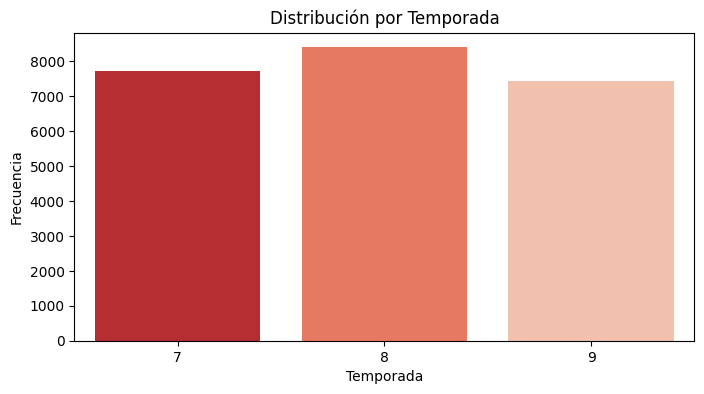

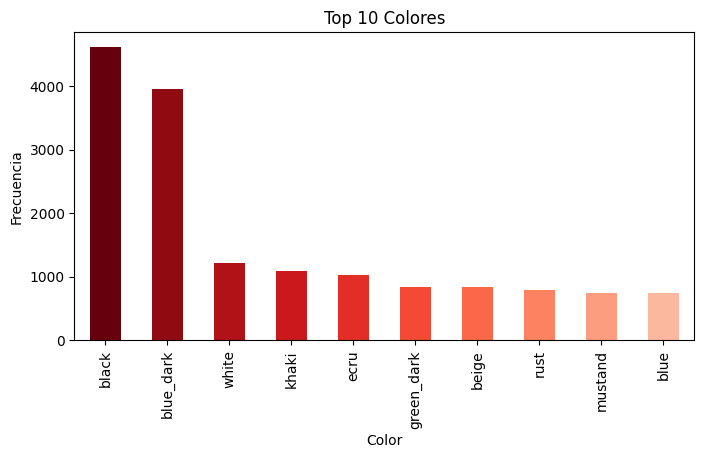

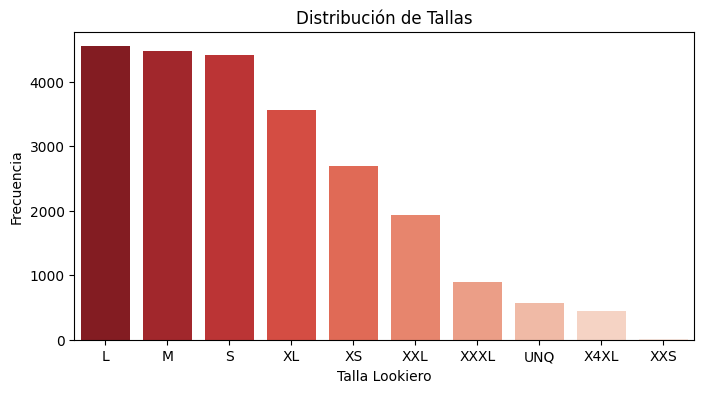

In [34]:
# Visualización de 'season'
plt.figure(figsize=(8, 4))
sns.countplot(data=df_resultado, x='season', palette='Reds_r')
plt.title('Distribución por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de colores ('name_color')
color_names_dict = dict(zip(df_final['hexadecimal'], df_final['name_color']))
top_colors = df_resultado['hexadecimal'].value_counts().head(10)
color_map = plt.cm.Reds(range(255, 50, -int(255/12)))
plt.figure(figsize=(8, 4))
ax = top_colors.plot(kind='bar', color=color_map)
ax.set_xticklabels([color_names_dict.get(color, color) for color in top_colors.index])
plt.title('Top 10 Colores')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de tallas ('size')
plt.figure(figsize=(8, 4))
sns.countplot(data=df_resultado, x='size_lookiero', order=df_resultado['size_lookiero'].value_counts().index, palette='Reds_r')
plt.title('Distribución de Tallas')
plt.xlabel('Talla Lookiero')
plt.ylabel('Frecuencia')
plt.show()


In [35]:
# Contar los valores únicos de 'weather'
weather_unique = df_resultado['caracteristicas'].apply(lambda x: x['weather']).unique()

# Contar los valores únicos de 'season'
season_unique = df_resultado['season'].unique()

# Mostrar los resultados
print("Valores únicos de 'weather':", weather_unique)
print("Valores únicos de 'season':", season_unique)

# Comparar si son iguales
if set(weather_unique) == set(season_unique):
    print("Los valores únicos de 'weather' y 'season' son los mismos.")
else:
    print("Los valores únicos de 'weather' y 'season' no son los mismos.")


Valores únicos de 'weather': ['cold_season' 'warm_season' 'warm' 'cold']
Valores únicos de 'season': [8 7 9]
Los valores únicos de 'weather' y 'season' no son los mismos.


- Análisis características

                             id_variant                                    id  \
0  fbc2f719-e038-4243-892c-7bd2ca6e80b5  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
1  1920105d-0671-412b-b09f-ef1c983f2be5  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
2  a3a0144e-7aa5-4572-b513-285059a14735  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
3  c85666c0-a8ba-42f4-a30f-17687ad51ff5  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   
4  93db9797-3a66-4889-be9c-5d3522da96a1  5f5c4a50-557a-4d53-9e81-cc72fdd18fbf   

                    title  season hexadecimal     brand size_lookiero  \
0  Onljade Cardigan knit        8      000000  BRAND119            XL   
1  Onljade Cardigan knit        8      000000  BRAND119             M   
2  Onljade Cardigan knit        8      000000  BRAND119             S   
3  Onljade Cardigan knit        8      DFC8B2  BRAND119             L   
4  Onljade Cardigan knit        8      B94600  BRAND119             S   

                                     caracteristicas  top_type finishing  

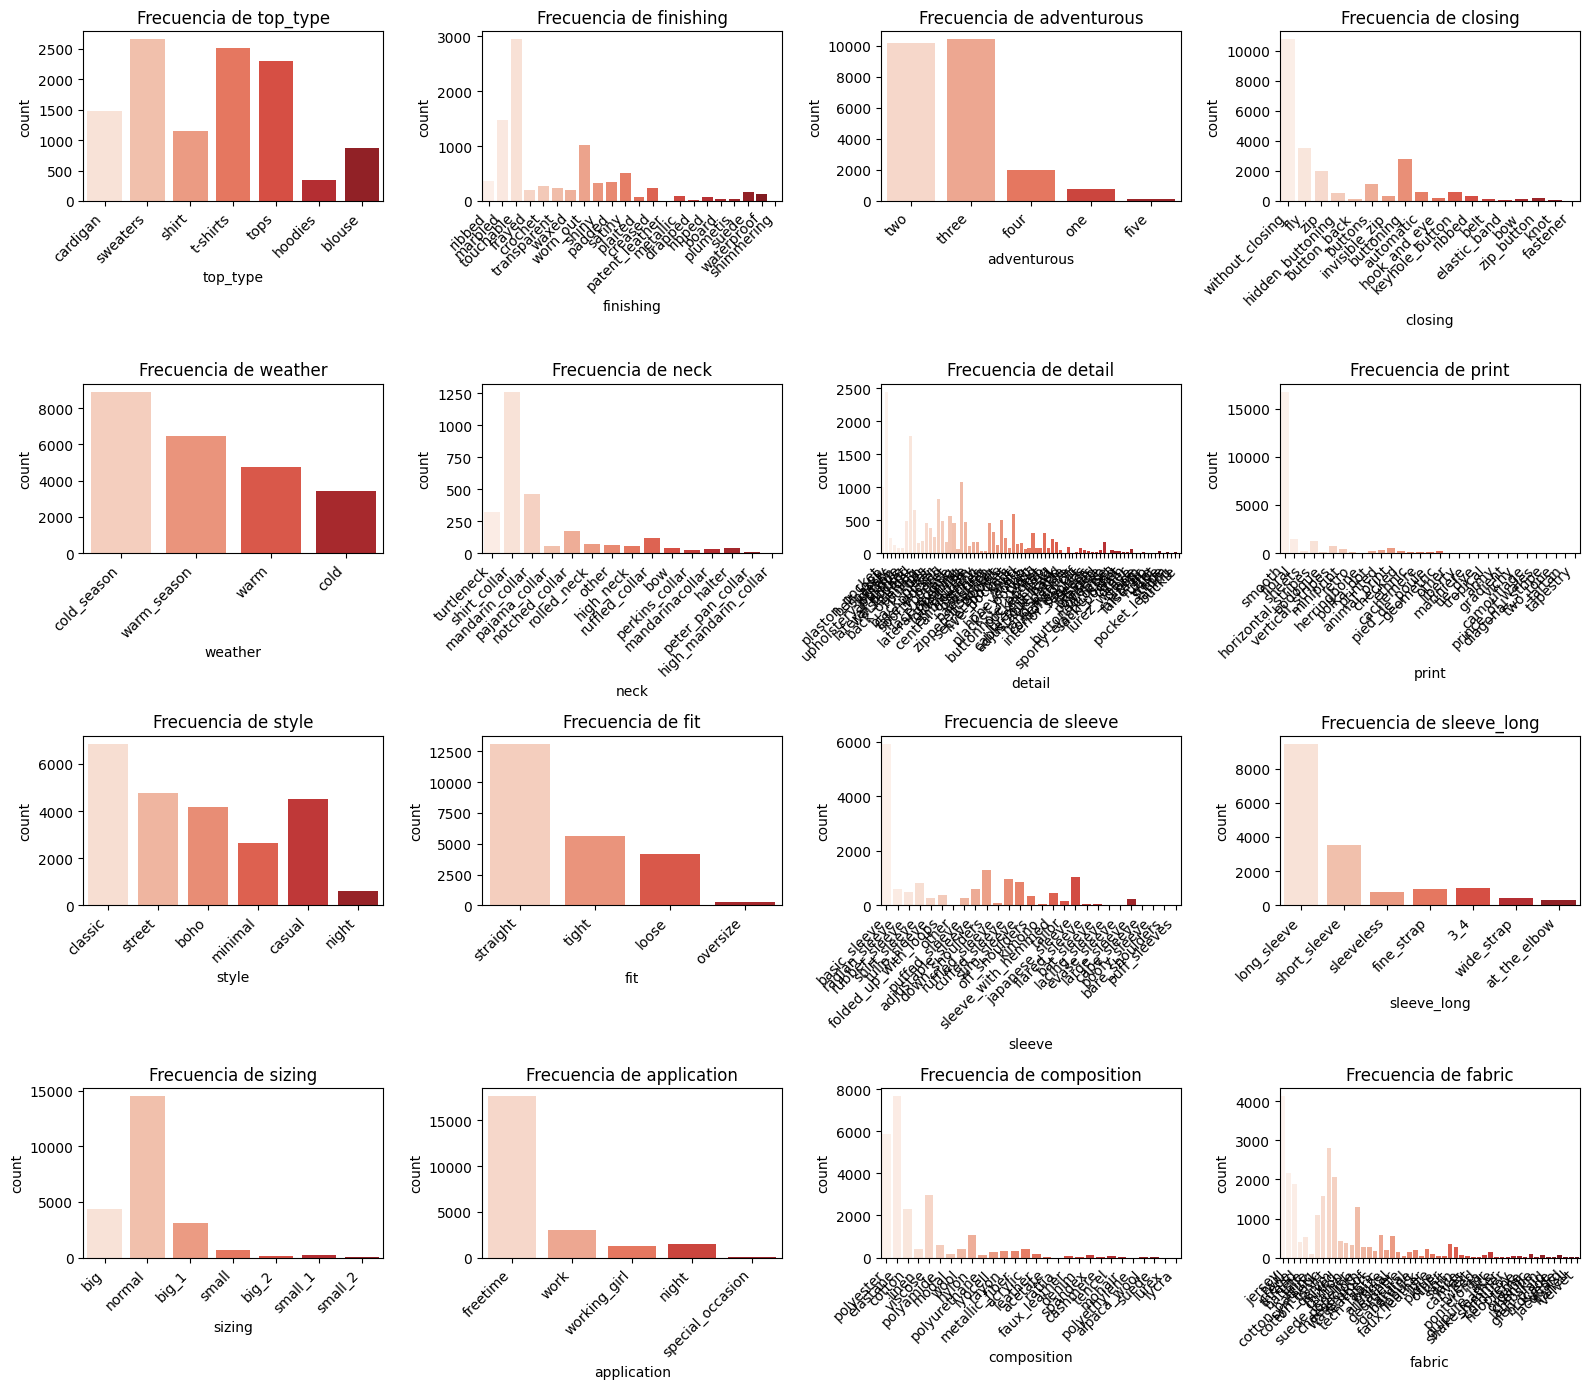

        hip_contour  waist_contour  chest_contour  sleeve_long_cm  \
count  23116.000000   23136.000000   16562.000000    14366.000000   
mean      52.656169      47.434388      52.933523       50.146805   
std        6.212800       7.976837       5.495879       20.303618   
min       35.000000      30.000000      36.000000        3.000000   
25%       48.000000      40.000000      49.000000       31.000000   
50%       53.000000      48.000000      52.000000       61.000000   
75%       56.000000      53.000000      56.000000       64.000000   
max       90.000000      80.000000      87.000000       78.000000   

            long_cm  
count  23124.000000  
mean      75.417921  
std       20.019781  
min       24.000000  
25%       63.000000  
50%       69.000000  
75%       92.000000  
max      156.000000  


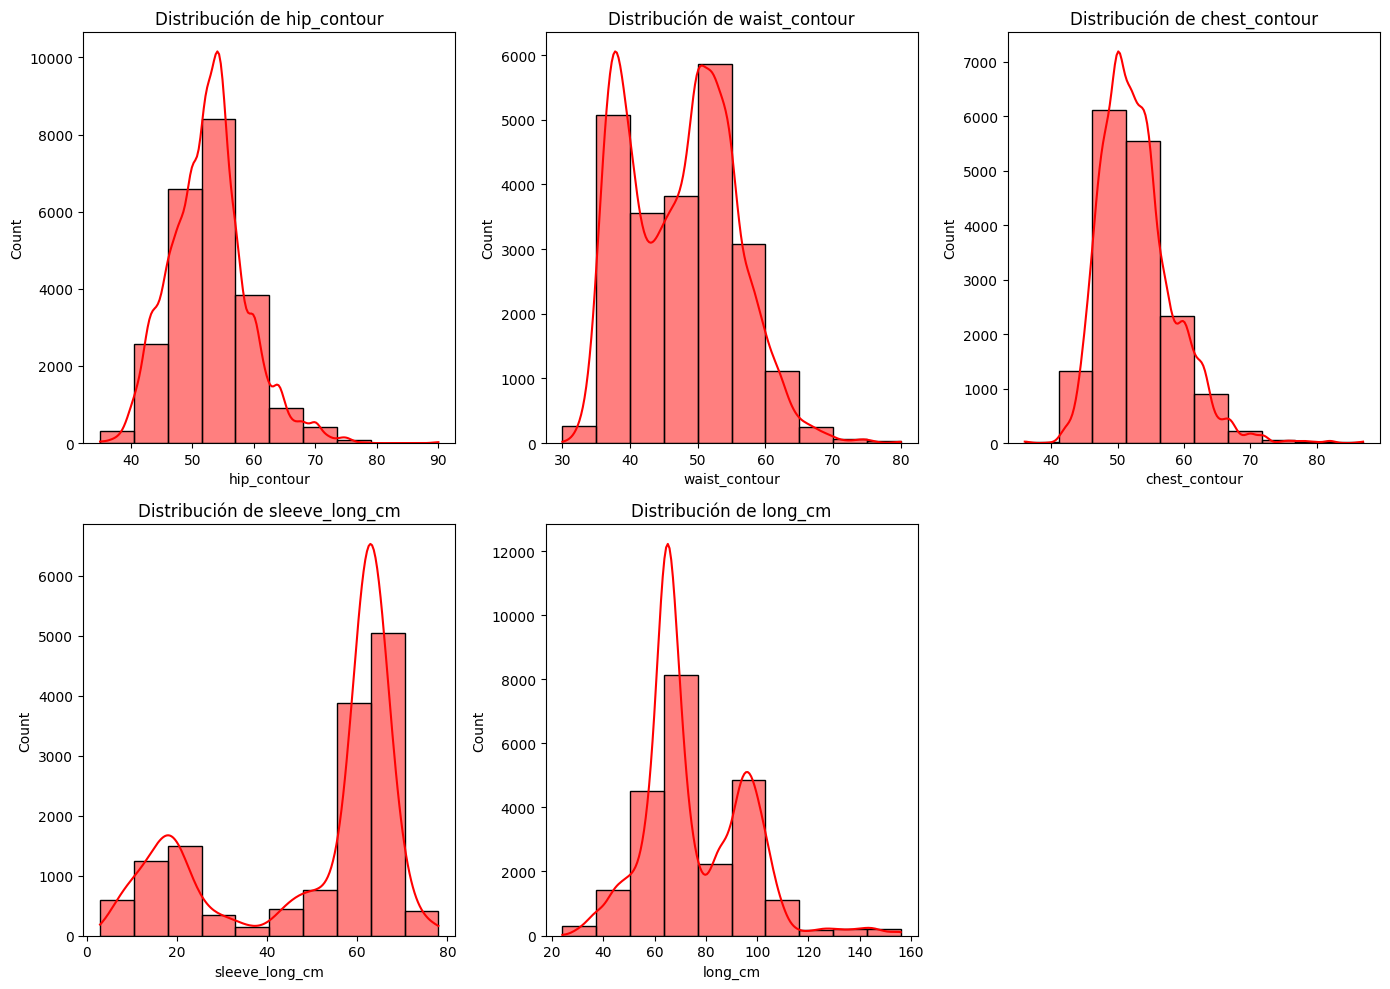

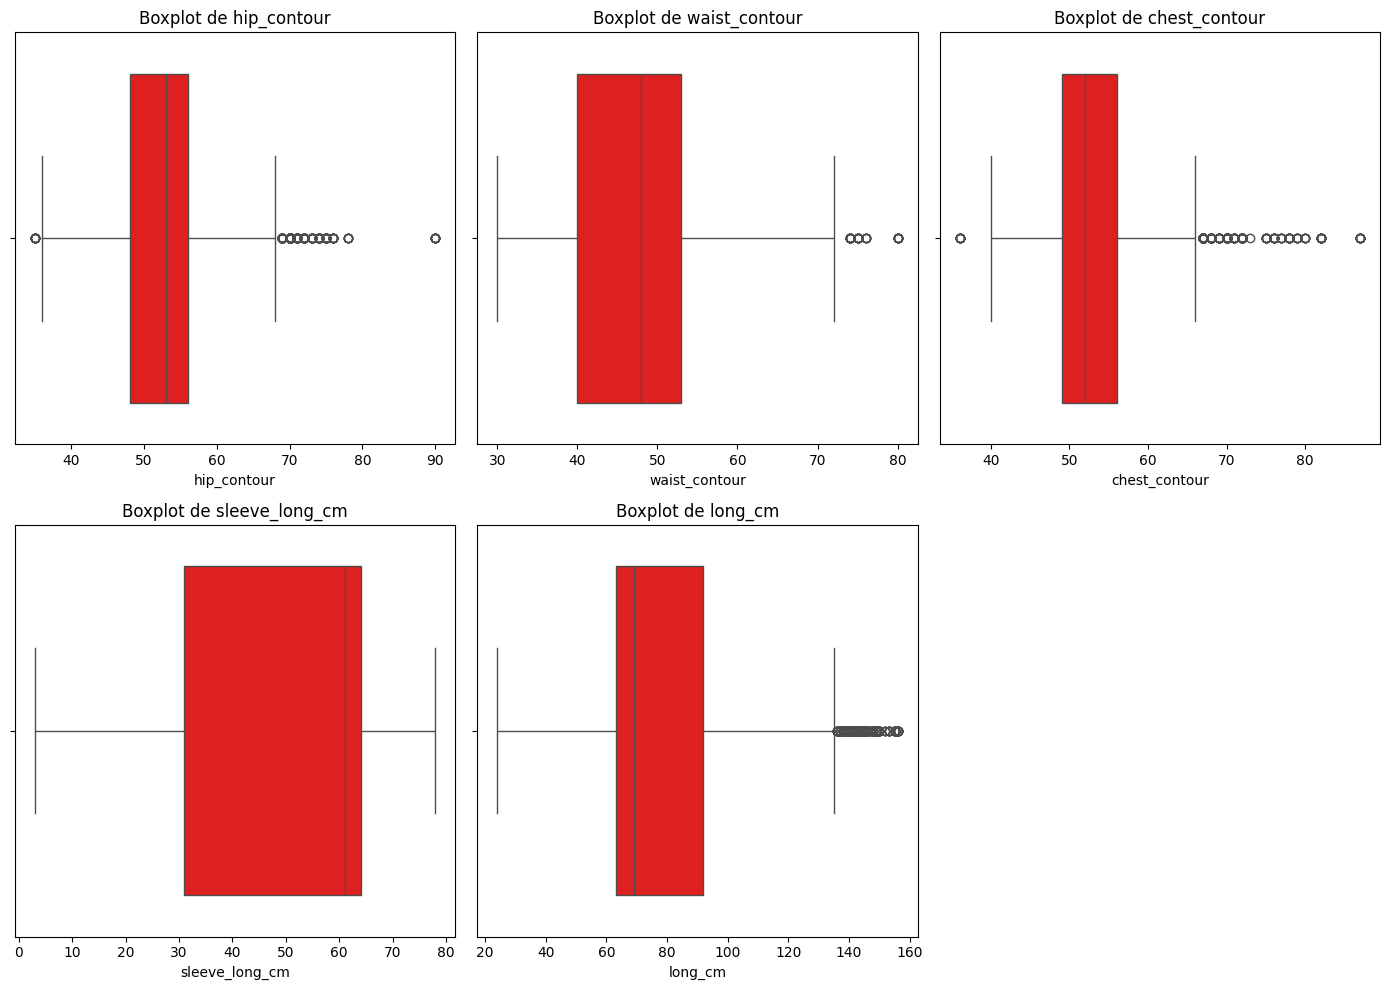

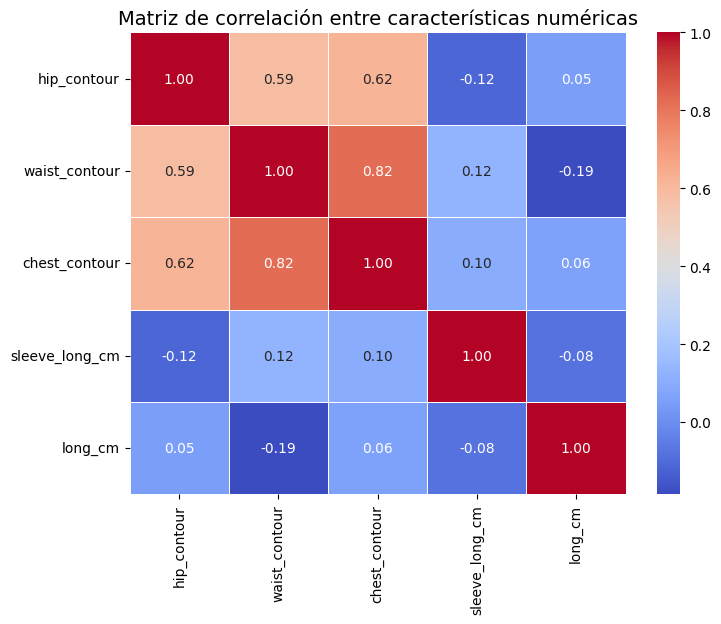

In [36]:
df_features = pd.json_normalize(df_resultado['caracteristicas'])

df_resultado = pd.concat([df_resultado, df_features], axis=1)

print(df_resultado.head())

# Análisis de características categóricas

categorical_features = ['top_type', 'finishing', 'adventurous', 'closing', 'weather', 'neck', 
                        'detail', 'print', 'style', 'fit', 'sleeve', 'sleeve_long', 'sizing', 
                        'application', 'composition', 'fabric']

plt.figure(figsize=(16, 14))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)  # Crear subgráficos (4 filas, 4 columnas)
    sns.countplot(data=df_resultado, x=feature, palette='Reds')
    plt.title(f'Frecuencia de {feature}', fontsize=12)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#  Análisis de características numéricas

numeric_features = ['hip_contour', 'waist_contour', 'chest_contour', 'sleeve_long_cm', 'long_cm']

df_resultado[numeric_features] = df_resultado[numeric_features].apply(pd.to_numeric, errors='coerce')

print(df_resultado[numeric_features].describe())

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Crear subgráficos (2 filas, 3 columnas)
    sns.histplot(df_resultado[feature], kde=True, color='red', bins=10)
    plt.title(f'Distribución de {feature}', fontsize=12)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # Crear subgráficos (2 filas, 3 columnas)
    sns.boxplot(data=df_resultado, x=feature, color='red')
    plt.title(f'Boxplot de {feature}', fontsize=12)

plt.tight_layout()
plt.show()

correlation_matrix = df_resultado[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre características numéricas', fontsize=14)
plt.show()
